In [43]:
import numpy as np
import matplotlib.pyplot as plt
import math
import os
%config InlineBackend.figure_format='svg'

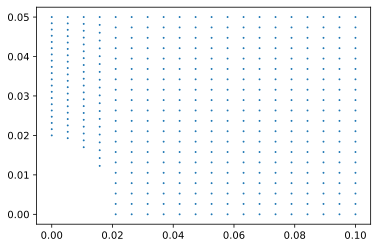

In [35]:
L = 0.1
h = 0.05
r = 0.02

nb_element = 20

Nodes = []
for x in np.linspace(0,L,nb_element):
    if x<r:
        y0 = math.sqrt(r**2-x**2)
        for y in np.linspace(y0,h,nb_element):
            Nodes.append([x,y])
    else:
        for y in np.linspace(0,h,nb_element):
            Nodes.append([x,y])

points = np.array(Nodes)
plt.scatter(points[:,0],points[:,1],s=1)
plt.show()

In [36]:
# Create elements
from scipy.spatial import Delaunay
tri = Delaunay(points)

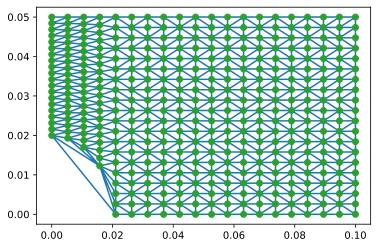

In [37]:
plt.triplot(points[:,0],points[:,1],tri.simplices)
plt.plot(points[:,0],points[:,1],'o')
plt.show()

In [38]:
tri.simplices

array([[ 80,  60,   0],
       [ 30,  31,  10],
       [ 51,  30,  50],
       ...,
       [108,  89,  88],
       [107, 108,  87],
       [ 87, 108,  88]], dtype=int32)

In [39]:
p = []
r2 = 0.0195
for x in np.linspace(0,r2,10):
    p.append([x,math.sqrt(r2**2-x**2)])
tri.find_simplex(p)

array([ -1, 154, 154, 154, 153, 153, 153,   0,  21,  -1], dtype=int32)

In [46]:
mesh = np.delete(tri.simplices,[0,21,153,154],0)
nb_nodes = len(mesh)

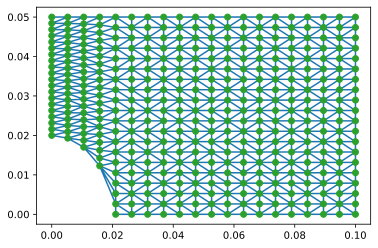

In [47]:
plt.triplot(points[:,0],points[:,1],mesh)
plt.plot(points[:,0],points[:,1],'o')
plt.show()

In [51]:
# Save to a file
with open('plate_mesh.dat','w') as f:
    f.write(f'{nb_nodes} {nb_element}\n')
    for i,node in enumerate(Nodes):
        f.write(f'{i} {node[0]} {node[1]}\n')
    for j,elem in enumerate(mesh):
        f.write(f'{j} {elem[0]} {elem[1]} {elem[2]}\n')

In [60]:
a = np.random.randint(16,size=(4,4))

In [61]:
a

array([[ 6, 11,  8, 12],
       [ 0, 15,  1,  7],
       [ 3, 15,  0, 12],
       [12, 11,  5,  5]])

In [66]:
idx = np.argsort(a[:,1],axis=0)

In [67]:
idx

array([0, 3, 1, 2])